# Generalization with Self-organizing Map (SOM) and NeuPy
Utilizando un SOM para reconocer fraudes bancarios.  
Autor: Grupo 4  
Asignatura: Tratamiento Inteligente de Datos  
ESIT-ULL  
Date: 19/05/2021:

## Carga de librerías  

Se utilizan las librerías de pandas, numpy, matplotlib.pyplot y matplotlib.gridspec.
A continuación, se cargan a memoria los datos, leyendo una parte desde nuestro fichero CSV.
En este caso,  se tratan de datos de transacciones bancarias realizadas. El problema a resolver consistirá en identificar la clase de la transacción, siendo 0 no fraude y 1 fraude.

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
dataset = pd.read_csv("../../creditcard.csv")
print(dataset)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [2]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Normalización  

Si observamos el resumen de nuestro banco de datos, ciertas variables como _Amount_ o _Time_ tienen cierta discordancia respecto a las magnitudes de los valores con el resto de las variables. Para solventar este inconveniente normalizamos estas dos variables de manera que tengan magnitudes similares a las demás.

In [3]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
scaled_amount = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
scaled_time = rob_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Time','Amount'], axis=1, inplace=True)

dataset.insert(0, 'scaled_amount', scaled_amount)
dataset.insert(1, 'scaled_time', scaled_time)

dataset.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.927124,0.118914,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,0.001727
std,3.495006,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.307413,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.229162,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.770838,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,358.683155,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


Ahora las variables están normalizadas.  
A continuación, incluimos más librerías, todas ellas de sklearn.

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
from neupy import algorithms, utils, init
from datetime import datetime

/home/gabriel/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gabriel/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gabriel/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gabriel/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

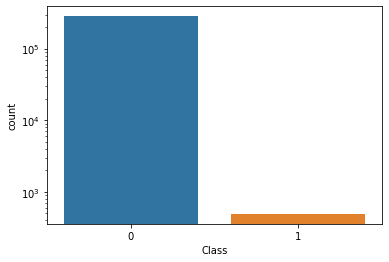

In [6]:
import seaborn as sn
ax=sn.countplot(x='Class',data=dataset);
ax.set_yscale('log')

## Creación de subconjuntos

Para la creación de los subconjuntos de train, test y valid, vamos a dividir el conjunto de datos en dos partes iguales, una será para el entrenamiento y la otra mitad será dividida de nuevo en test y valid, obteniendo una proporción de 50% para train, 25% para test y 25% para valid.  


In [7]:
from pandas import DataFrame

# Data preprocessing
train_size = 0.50
test_size = 1 - train_size
train, test = train_test_split(dataset, test_size = test_size)

## Undersampling
Dado que la base de datos está enormemente desbalanceada, para que el aprendizaje sea efectivo debemos equilibrar el número de fraudes y no fraudes. Para ello, usamos la técnica de <i>undersampling</i>. También existe el <i>upsampling</i> pero en este caso hemos probado con <i>undersampling</i> ya que, cuando analizamos resultados con ambas técnicas en fase de preprocesamiento, arrojó mejores resultados el <i>undersampling</i>.

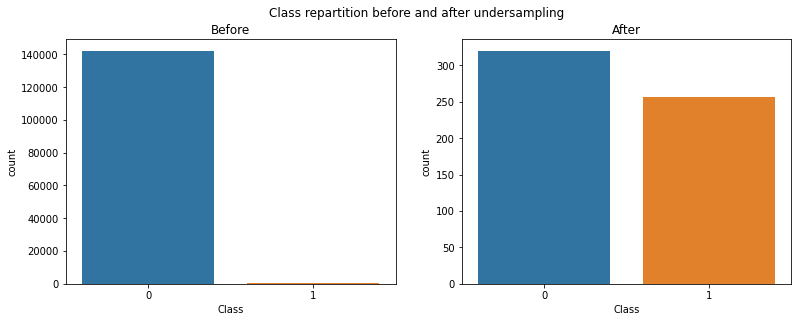

In [8]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.8)

cols = train.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

#define X and Y
X = train[cols]
Y = train[target]

#undersample
X_under, Y_under = undersample.fit_resample(X, Y)
class_ = pd.DataFrame(Y_under, columns = ['Class'])

fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sn.countplot(x="Class", data=train, ax=axs[0])
sn.countplot(x="Class", data=class_, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

train = pd.concat([X_under, Y_under], axis=1)

In [9]:
patterns_input = train.iloc[:,1:30].values[:]
input_test = test.iloc[:,1:30].values[:]

patterns_target = train.iloc[:,-1].values[:]
target_test = test['Class'].values[:]

input_train, input_valid, target_train, target_valid = train_test_split(
    patterns_input, patterns_target, train_size=train_size, test_size=test_size,
    random_state=0, shuffle=True)

print(input_train.shape, target_train.shape)
print(input_valid.shape, target_valid.shape)

(288, 29) (288,)
(288, 29) (288,)


## Resultados iniciales SOM  

Se entrena el modelo SOM con 55 iteraciones, una rejilla de 20x20 y distancia euclídea:

In [10]:
# Modeling SOM
# ------------
max_iter_som = 55
grid_height = 20
grid_width = 20
distance = 'euclid'
learning_radius = 5
step = 0.5
reduce_step_after = max_iter_som - 5
std = 1.0
reduce_std_after = max_iter_som - 5
weight = init.Normal()

print("Learning %dx%d SOM with %d maximum number of iterations and ..." % (grid_height, grid_width, max_iter_som))

now = datetime.now()
# Random generator seed for NeuPy
utils.reproducible(0)

sofm = algorithms.SOFM(
    n_inputs = input_train.shape[1],
    features_grid = (grid_height, grid_width),
    distance = distance,
    weight = weight,
    learning_radius = learning_radius,
    reduce_radius_after = max_iter_som // learning_radius,  # 0 radius at end
    step = step,
    reduce_step_after = reduce_step_after,
    std = std,
    reduce_std_after = reduce_std_after,
    shuffle_data = False,
    verbose = True,
)

sofm.train(input_train, epochs=max_iter_som)
sofm_output_train = sofm.predict(input_train)
sofm_output_valid = sofm.predict(input_valid)
print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())

Learning 20x20 SOM with 55 maximum number of iterations and ...

Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = [20, 20]
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 5
[OPTION] n_inputs = 29
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 11
[OPTION] reduce_std_after = 50
[OPTION] reduce_step_after = 50
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] std = 1.0
[OPTION] step = 0.5
[OPTION] verbose = True
[OPTION] weight = Normal(mean=0, std=0.01)

#1 : [75 ms] train: 1.447416
#2 : [77 ms] train: 1.377615
#3 : [72 ms] train: 1.352475
#4 : [66 ms] train: 1.308755
#5 : [66 ms] train: 1.219016
#6 : [67 ms] train: 1.205630
#7 : [71 ms] train: 1.205848
#8 : [69 ms] train: 1.201140
#9 : [66 ms] train: 1.225573
#10 : [69 ms] train: 1.207468
#11 : [69 ms] train: 1.102755
#12 : [68 ms] train: 1.100235


 Se visualizan a continuación los prototipos de cada una de las neuronas de la rejilla SOM

Building visualization of prototypes grid ...
Progress: 0.00%
Progress: 5.00%
Progress: 10.00%
Progress: 15.00%
Progress: 20.00%
Progress: 25.00%
Progress: 30.00%
Progress: 35.00%
Progress: 40.00%
Progress: 45.00%
Progress: 50.00%
Progress: 55.00%
Progress: 60.00%
Progress: 65.00%
Progress: 70.00%
Progress: 75.00%
Progress: 80.00%
Progress: 85.00%
Progress: 90.00%
Progress: 95.00%


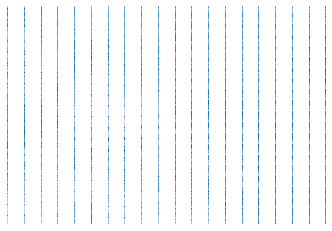

In [11]:
def plot_prototypes_grid(grid_height, grid_width, weight):
    """
    Visualization prototypes of SOM grid
    """
    print("Building visualization of prototypes grid ...")
    grid = gridspec.GridSpec(grid_height, grid_width)
    grid.update(wspace=0, hspace=0)
    for row_id in range(grid_height):
        print("Progress: {:.2%}".format(row_id / grid_height))
        for col_id in range(grid_width):
            index = row_id * grid_width + col_id
            sample = weight[:,index]
            _ = plt.subplot(grid[index])
            _ = plt.imshow(sample.reshape((29, 1)), cmap='PuBu')
            _ = plt.axis('off')
    plt.show()

plot_prototypes_grid(grid_height, grid_width, sofm.weight)

En esta gráfica vemos una cuadrícula que representa los pesos obtenidos. De este tipo de gráfica es bastante complicado sacar información así que haremos una gráfica mejor y más fácil de entender.  

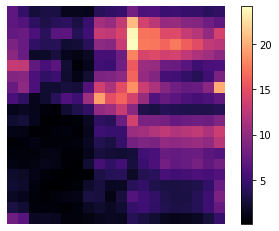

In [12]:
from itertools import product

def iter_neighbours(weights, hexagon=False):
    grid_height, grid_width = weights.shape

    hexagon_even_actions = ((-1, 0), (0, -1), (1, 0), (0, 1), (1, 1), (-1, 1))
    hexagon_odd_actions = ((-1, 0), (0, -1), (1, 0), (0, 1), (-1, -1), (1, -1))
    rectangle_actions = ((-1, 0), (0, -1), (1, 0), (0, 1))

    for neuron_x, neuron_y in product(range(grid_height), range(grid_width)):
        neighbours = []

        if hexagon and neuron_x % 2 == 1:
            actions = hexagon_even_actions
        elif hexagon:
            actions = hexagon_odd_actions
        else:
            actions = rectangle_actions

        for shift_x, shift_y in actions:
            neigbour_x = neuron_x + shift_x
            neigbour_y = neuron_y + shift_y

            if 0 <= neigbour_x < grid_height and 0 <= neigbour_y < grid_width:
                neighbours.append((neigbour_x, neigbour_y))

        yield (neuron_x, neuron_y), neighbours

def compute_heatmap(height, width, weight):
    heatmap = np.zeros((height, width))
    for (neuron_x, neuron_y), neighbours in iter_neighbours(weight):
        total_distance = 0

        for (neigbour_x, neigbour_y) in neighbours:
            neuron_vec = weight[neuron_x, neuron_y]
            neigbour_vec = weight[neigbour_x, neigbour_y]

            distance = np.linalg.norm(neuron_vec - neigbour_vec)
            total_distance += distance

        avg_distance = total_distance / len(neighbours)
        if neuron_y < height and neuron_x < width:
            heatmap[neuron_x, neuron_y] = avg_distance

    return heatmap

heatmap = compute_heatmap(grid_height, grid_width, sofm.weight)

plt.imshow(heatmap, cmap='magma', interpolation='nearest')

plt.axis('off')
plt.colorbar()
plt.show()



La gráfica de arriba representa el grid de 20x20.

## Resultados iniciales Counterpropagation  

Se entrena el modelo Perceptrón Simple con 30 iteraciones teniendo como entradas las salidas de SOM, lo que simula una red Counterpropagation:

In [13]:
max_iter_per = 30

print("Learning a Perceptron with %d maximum number of iterations and ..." % max_iter_per)

per = Perceptron(max_iter=max_iter_per, shuffle=False, random_state=0, verbose=True)
per.fit(sofm_output_train, target_train)


# Intitial results
# ------------
print("Printing initial results")

predict_train = per.predict(sofm_output_train)
predict_valid = per.predict(sofm_output_valid)

print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))

print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))

print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))

Learning a Perceptron with 30 maximum number of iterations and ...
-- Epoch 1
Norm: 13.86, NNZs: 168, Bias: 0.000000, T: 288, Avg. loss: 0.298611
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 18.65, NNZs: 204, Bias: 0.000000, T: 576, Avg. loss: 0.013889
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 20.05, NNZs: 214, Bias: 0.000000, T: 864, Avg. loss: 0.010417
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 20.78, NNZs: 218, Bias: 0.000000, T: 1152, Avg. loss: 0.010417
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 21.21, NNZs: 219, Bias: 0.000000, T: 1440, Avg. loss: 0.010417
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 21.59, NNZs: 221, Bias: 0.000000, T: 1728, Avg. loss: 0.013889
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 21.91, NNZs: 221, Bias: 0.000000, T: 2016, Avg. loss: 0.010417
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 22.05, NNZs: 221, Bias: 0.000000, T: 2304, Avg. loss: 0.017361
Total training time: 0.00 seconds.
Convergence afte

Los resultados aparentan ser buenos, las matrices de cruces tiene la mayoría del peso en la diagonal principal y para todas las clases se obtiene buenas precisions y recalls.  

## Optimización arquitectura SOM  

Para tratar de mejorar los resultados del CPN se estudia las dimensiones de la rejilla SOM más adecuadas, probando con distintos valores entre 2 y 20, repitiendo parar cada configuración 5 veces y quedándose con aquella de mayor precisión en el conjunto de validación. Elegimos estos valores para probar con mayor precisión las rejillas de tamaños pequeños y comparar con rejillas de mayor tamaño como 15 o 20. Se ha hecho así porque las rejillas por debajo de 7 dieron los mejores resultados.

In [14]:
print("Architecture optimization")

# Test SOM with differents number of grid units and several repetitions
tests_grid_side = [2, 3, 4, 5, 6, 7, 10, 15, 20]
n_reps = 5

now = datetime.now()
best_sofm = []
best_per = []
best_acc = 0.0
accs_train = []
accs_valid = []
for grid_side in tests_grid_side:
    max_acc_train = max_acc_valid = 0.0
    for random_state in range(n_reps):
        utils.reproducible(random_state)
        sofm = algorithms.SOFM(n_inputs = input_train.shape[1], features_grid = (grid_side, grid_side), distance = distance, weight = weight, learning_radius = learning_radius, reduce_radius_after = max_iter_som // learning_radius, step = step, reduce_step_after = reduce_step_after, std = std, reduce_std_after = reduce_std_after, shuffle_data = False, verbose = False)
        sofm.train(input_train, epochs=max_iter_som)
        sofm_output_train = sofm.predict(input_train)
        sofm_output_valid = sofm.predict(input_valid)
        per = Perceptron(max_iter=max_iter_per, shuffle=False, random_state=random_state, verbose=False)
        _ = per.fit(sofm_output_train, target_train)
        acc_train = accuracy_score(target_train, per.predict(sofm_output_train))
        acc_valid = accuracy_score(target_valid,per.predict(sofm_output_valid))
        print("Seed = %d, train acc = %.8f, valid acc = %.8f" % (random_state, acc_train, acc_valid))
        if (max_acc_valid < acc_valid):
            max_acc_valid = acc_valid
            max_acc_train = acc_train
            if (acc_valid > best_acc):
                best_acc = acc_valid
                best_per = per
                best_sofm = sofm
    accs_train.append(max_acc_train)
    accs_valid.append(max_acc_valid)
    print("Grid size = %ix%i, train acc = %.8f, max valid acc = %.8f" % (grid_side, grid_side, max_acc_train, max_acc_valid))

print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())
print("Best CPN valid accuracy: %.8f%%" % (best_acc * 100))
print("Best SOM: ", best_sofm)
print("Best Perceptron: ", best_per)

Architecture optimization
Seed = 0, train acc = 0.92708333, valid acc = 0.90625000
Seed = 1, train acc = 0.92708333, valid acc = 0.90625000
Seed = 2, train acc = 0.92708333, valid acc = 0.90625000
Seed = 3, train acc = 0.92708333, valid acc = 0.90625000
Seed = 4, train acc = 0.92708333, valid acc = 0.90625000
Grid size = 2x2, train acc = 0.92708333, max valid acc = 0.90625000
Seed = 0, train acc = 0.92708333, valid acc = 0.90625000
Seed = 1, train acc = 0.92708333, valid acc = 0.90625000
Seed = 2, train acc = 0.92708333, valid acc = 0.90625000
Seed = 3, train acc = 0.92708333, valid acc = 0.90625000
Seed = 4, train acc = 0.92708333, valid acc = 0.90625000
Grid size = 3x3, train acc = 0.92708333, max valid acc = 0.90625000
Seed = 0, train acc = 0.93055556, valid acc = 0.93750000
Seed = 1, train acc = 0.93055556, valid acc = 0.93750000
Seed = 2, train acc = 0.93055556, valid acc = 0.93750000
Seed = 3, train acc = 0.93055556, valid acc = 0.93750000
Seed = 4, train acc = 0.93055556, valid 

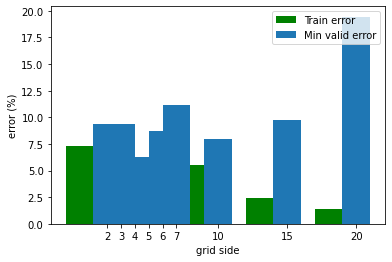

In [15]:
width = 2
plt.bar(np.array(tests_grid_side) - width, 100 *(1- np.array(accs_train)), color='g', width=width, label='Train error')
plt.bar(np.array(tests_grid_side), 100 *(1- np.array(accs_valid)), width=width, label='Min valid error')
plt.xlabel('grid side')
plt.ylabel('error (%)')
plt.xticks(np.array(tests_grid_side), tests_grid_side)
plt.legend(loc='upper right')
plt.show()


## Resultados finales mejor CPN  
Se calculan los resultados finales para el mejor CPN obtenido, incluido el conjunto de test:

In [16]:
print("Printing final results")

sofm_output_train = best_sofm.predict(input_train)
sofm_output_valid = best_sofm.predict(input_valid)
sofm_output_test = best_sofm.predict(input_test)
predict_train = best_per.predict(sofm_output_train)
predict_valid = best_per.predict(sofm_output_valid)
predict_test = best_per.predict(sofm_output_test)

print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))
print("Test accuracy: %.3f%%" % (accuracy_score(target_test, predict_test) * 100))

print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))
print("Test confusion matrix:")
print(confusion_matrix(target_test, predict_test))

print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))
print("Test classification report:")
print(classification_report(target_test, predict_test))

Printing final results
Train accuracy: 93.056%
Valid accuracy: 93.750%
Test accuracy: 98.053%
Train confusion matrix:
[[157   5]
 [ 15 111]]
Valid confusion matrix:
[[155   3]
 [ 15 115]]
Test confusion matrix:
[[139421   2747]
 [    26    210]]
Train classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       162
           1       0.96      0.88      0.92       126

    accuracy                           0.93       288
   macro avg       0.93      0.93      0.93       288
weighted avg       0.93      0.93      0.93       288

Valid classification report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       158
           1       0.97      0.88      0.93       130

    accuracy                           0.94       288
   macro avg       0.94      0.93      0.94       288
weighted avg       0.94      0.94      0.94       288

Test classification report:
              

Se observa que los resultados finales del mejor CPN obtenido para el conjunto de test es de un 95,017% gracias a la mejora. El error final para el conjunto de validación es un 2,13% peor que el conjunto de test. En la matriz de confusión y el informe de clasificación del conjunto de test se aprecia que se distinguen las transacciones fraudulentas de las no fraudulentas decentemente. Se muestran también las curvas ROC para el conjunto de test. Para facilitar la visualización de los datos finales, añadimos el heatmap usado anteriormente.

[ 1. -1. -1. ... -1. -1. -3.]
Printing ROC curves of test set


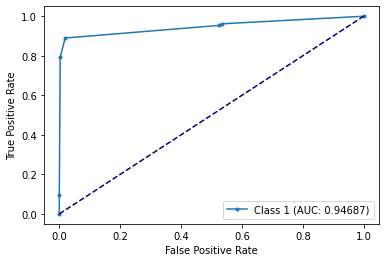

Building visualization of prototypes grid ...
Progress: 0.00%
Progress: 25.00%
Progress: 50.00%
Progress: 75.00%


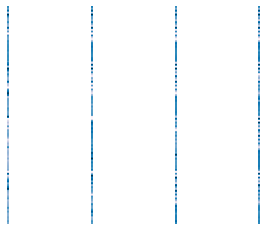

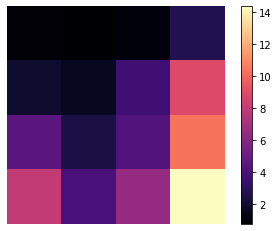

In [17]:
# ROC curves of test set
per_probs = best_per.decision_function(sofm_output_test)
classes  = np.unique(target_train)
per_auc = []
per_fpr = []
per_tpr = []
print(per_probs)
per_auc.append(roc_auc_score(target_test==True, per_probs))
fpr, tpr, _ = roc_curve(target_test==True, per_probs)
per_fpr.append(fpr)
per_tpr.append(tpr)

print("Printing ROC curves of test set")
# plot the roc curve for the model
   # plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
_ = plt.plot(per_fpr[0], per_tpr[0], marker='.', label='Class %d (AUC: %.5f)' % (True, per_auc[0]))

# axis labels
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Show grid prototypes
plot_prototypes_grid(best_sofm.features_grid[0], best_sofm.features_grid[1], best_sofm.weight)
heatmap = compute_heatmap(best_sofm.features_grid[0], best_sofm.features_grid[1], best_sofm.weight)

plt.imshow(heatmap, cmap='magma', interpolation='nearest')

plt.axis('off')
plt.colorbar()
plt.show()

## Conclusiones  

Analizando el trabajo de otros autores, por ejemplo <a href="https://www.kaggle.com/dylankfernandes/detecting-credit-card-fraud-with-neural-nets">Dylan Fernandes</a>, podemos apreciar que el tamaño escogido para la rejilla también ha sido de 6x6, por lo que podemos concluir qué análisis corresponde a lo que está descrito en el trabajo de terceros.  


Este resultado final parece bastante aceptable, es similar al obtenido con el Perceptrón Multicapa en una actividad anterior, aunque el resultado del conjunto de validación es aproximadamente un 2,063% menor. Esto se puede deber a que el MLP tiene una arquitectura más compleja.